In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from textwrap import wrap
from locale import atof

%matplotlib inline

# Introduction

This survey was given by Kaggle.com in August of 2017. They received over 16,000 usable responses from Data Scientists in over 170 countries. They asked both multiple choice questions and free-form answer questions, but for this capstone project I will only be analyzing the multiple choice answers and salary answers.

First things first: we will load our dataset into a pandas dataframe, then use the info() and head() methods.

Edit: When I started this project, I named my main dataframe 'mc_df' because it was short for 'multiple choice dataframe'. However, I'd like to note that I regret this choice because I have constantly forgotten this name and what it stands for. I have had to scroll all the way up to read it again far too many times! In the future, I will use a more descriptive name.

In [3]:
mc_df = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mc_df.info()
mc_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You'll notice that even in the first 5 rows, there are a lot of NaNs. This is because not all questions were asked to every respondent; those who were employed in data science were asked different questions than those who were in school and/or learning data science. In addition, one of the criteria for a valid survey response was that the respondent answers at least five questions. That means some people could have given up on the survey and still had their survey accepted.

All of the answers in this part of the survey were categorical, so I expect to do a lot of plots of value counts.

# Focus

I am going to focus on the following three questions:

1. What is the demographic make up of the respondents?
2. How is salary related to those demographics?
3. What skills do data scientists deem most important? Least important?

I plan to explore each of these questions in depth, with more than one sub-question

# What is the demographic makeup of the respondents? 

It is pretty well known that a lot of STEM jobs are male dominated, and unfortunately I don't think the field of data science will be any different. We will compare the survey's findings to the national average gender distribution in STEM jobs.

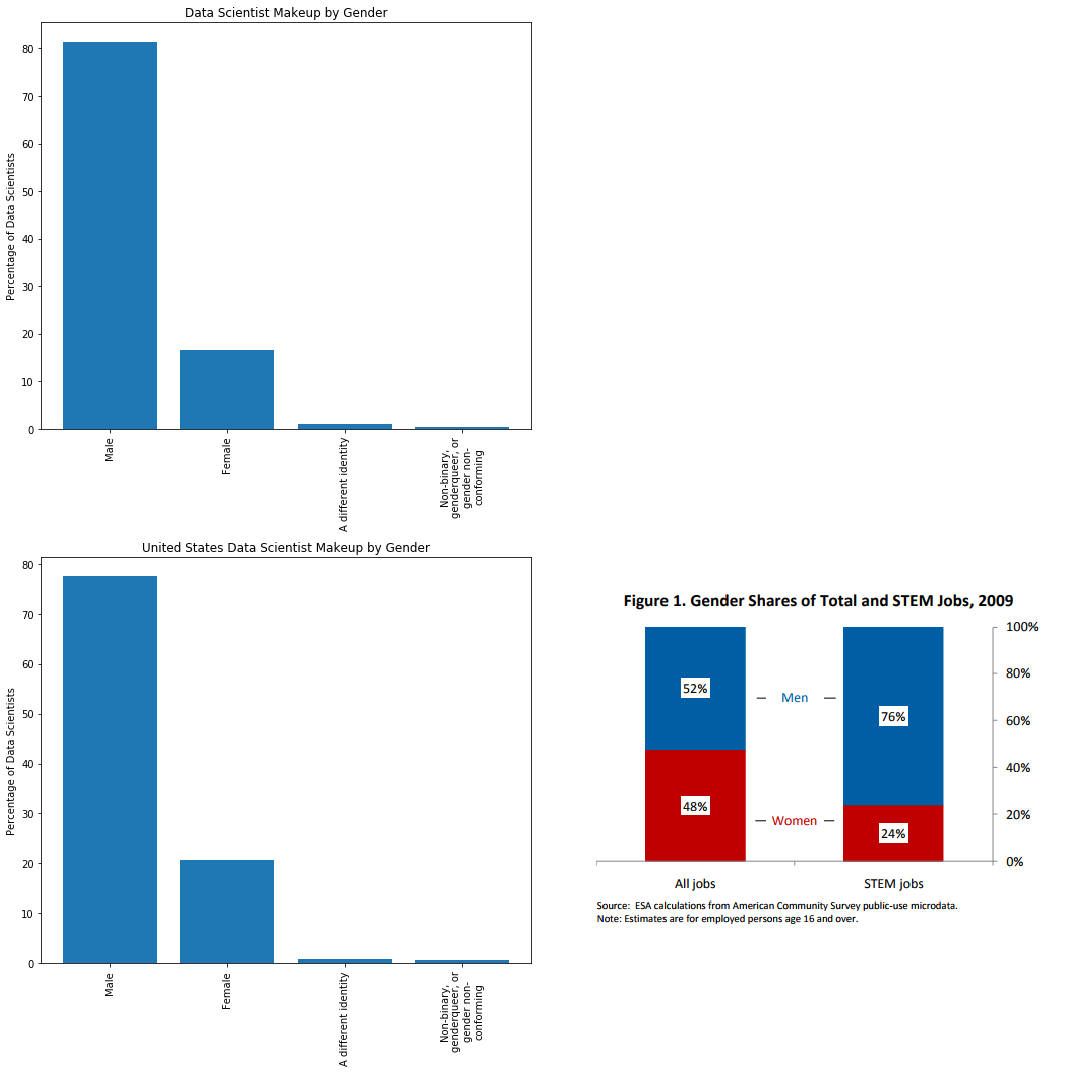

In [4]:
# We will use variables in the format category_counts and category_labels for consistency.
# We will also change the counts variable to a percentage so we can more easily compare to 
# the graph I found on the U.S. Department of Commerce
gender_counts = 100 * mc_df['GenderSelect'].value_counts() / len(mc_df['GenderSelect'])
gender_labels = mc_df['GenderSelect'].value_counts().index.tolist()

# This little function from the textwrap module will format 
# our labels so that they do not stretch too low underneath the image
gender_labels = [ '\n'.join(wrap(l, 20)) for l in gender_labels ]

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
# We first use a number to label each category, and then replace the number with a string using plt.xticks()
plt.bar(np.arange(len(gender_counts)), gender_counts)
plt.xticks(
    np.arange(len(gender_counts)), 
    gender_labels,
    rotation='90'
)
plt.ylabel('Percentage of Data Scientists')
plt.title('Data Scientist Makeup by Gender')

# Here is a breakdown for just the United States
plt.subplot(2, 2, 3)
temp_df =  mc_df[mc_df['Country'] == 'United States'] # There MUST be a one-liner for this
us_gender_counts = 100 * temp_df['GenderSelect'].value_counts() / len(temp_df['GenderSelect'])
plt.bar(np.arange(len(gender_counts)), us_gender_counts)
plt.xticks(
    np.arange(len(gender_counts)), 
    gender_labels,
    rotation='90'
)
plt.ylabel('Percentage of Data Scientists')
plt.title('United States Data Scientist Makeup by Gender')

# Finally, here is an image from the U.S. Dept. of Commerce
plt.subplot(2, 2, 4)
plt.axis('off')
gender_gap = mpimg.imread('us_gender_gap.png')
plt.imshow(gender_gap)

plt.tight_layout()
plt.show()

One thing to note about the comparison above is that the data was collected 8 years apart. In the technology world, that is a really long time! A lot of attention has been brought to the gender gap since then, and I would not be surprised if it was better. However, as of 2017, the gender gap in data science is still very much an issue in the United States.

## Where are the respondants from?

In [5]:
# First, let's make sure most of our data is valid
percent_na = 100 * mc_df['Country'].isnull().sum() / len(mc_df['Country'])
print('The percentage of missing country data is just {0:.2f}%'.format(percent_na))

The percentage of missing country data is just 0.72%


Great! Since we have less than 1% of NaN's out of almost 1700 respondants, we will get a pretty good idea of where everyone is from. As an added bonus, let's look at the percentage breakdown of each country's gender as well with a stacked bar plot.

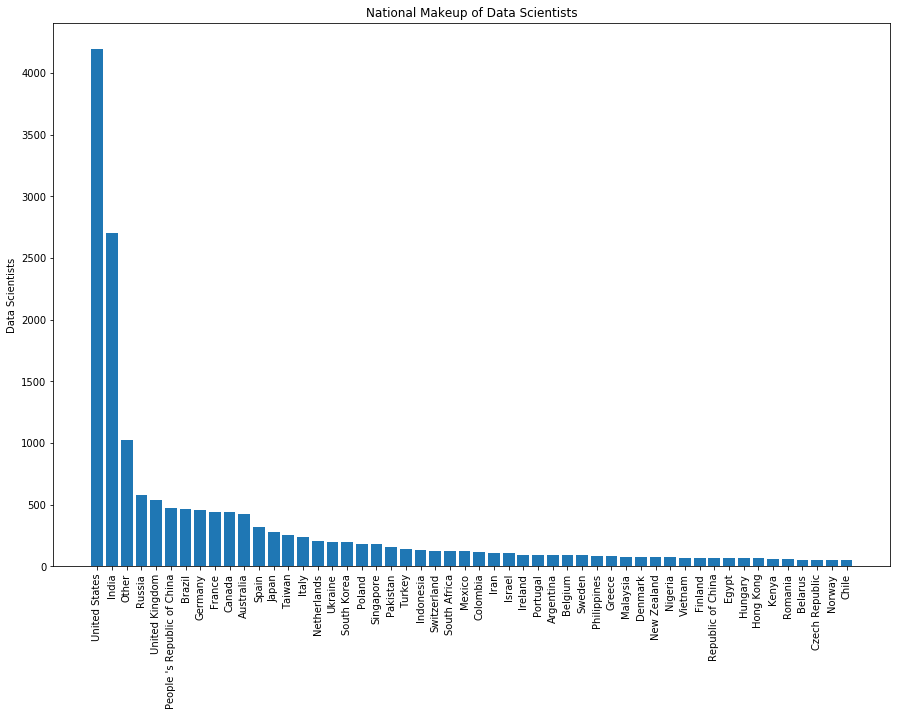

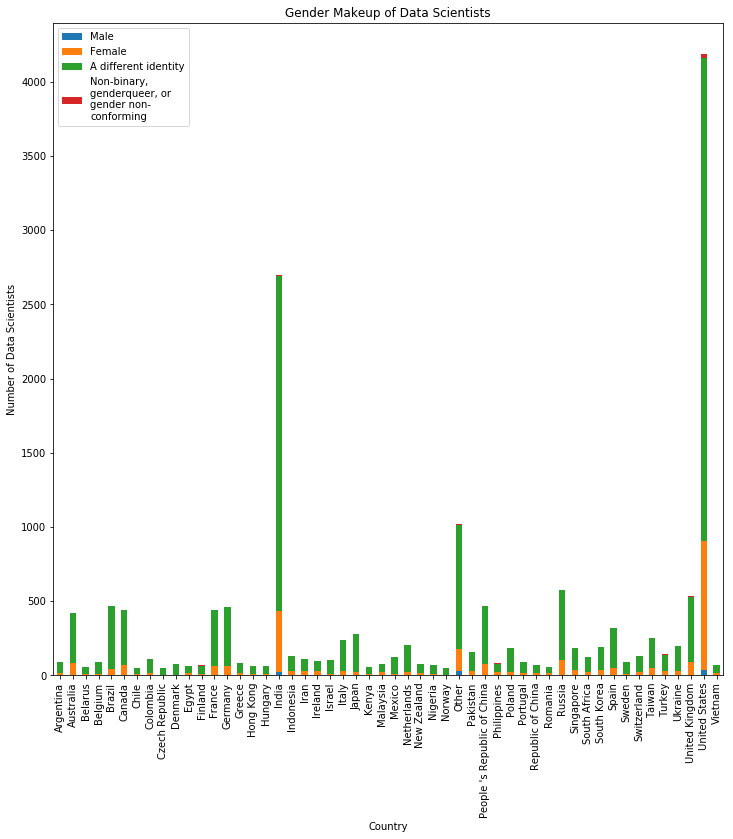

In [6]:
# I will also add all of the NaN responses to the "Other" response
mc_df['Country'].fillna('Other')

# # Now I'll make a counts and a labels variable for each country
country_counts = mc_df['Country'].value_counts()
country_labels = mc_df['Country'].value_counts().index.tolist()

# We can plot the country_counts variable with a bar graph
plt.figure(figsize=(15,10))
plt.bar(np.arange(len(country_counts)), country_counts)
plt.xticks(
    np.arange(len(country_counts)), 
    country_labels,
    rotation='90'
)
plt.ylabel('Data Scientists')
plt.title('National Makeup of Data Scientists')
plt.show()

# I want to get this data into percentages so we can compare different countries
# Unfortunately I wasn't able to get that to work.
country_gender_df = pd.DataFrame(mc_df.groupby(['Country', 'GenderSelect']).size()).unstack()
country_plot = country_gender_df.plot(figsize=(12, 12), kind='bar', stacked=True)
plt.ylabel('Number of Data Scientists')
plt.title('Gender Makeup of Data Scientists')
country_plot.legend(gender_labels)
plt.show()

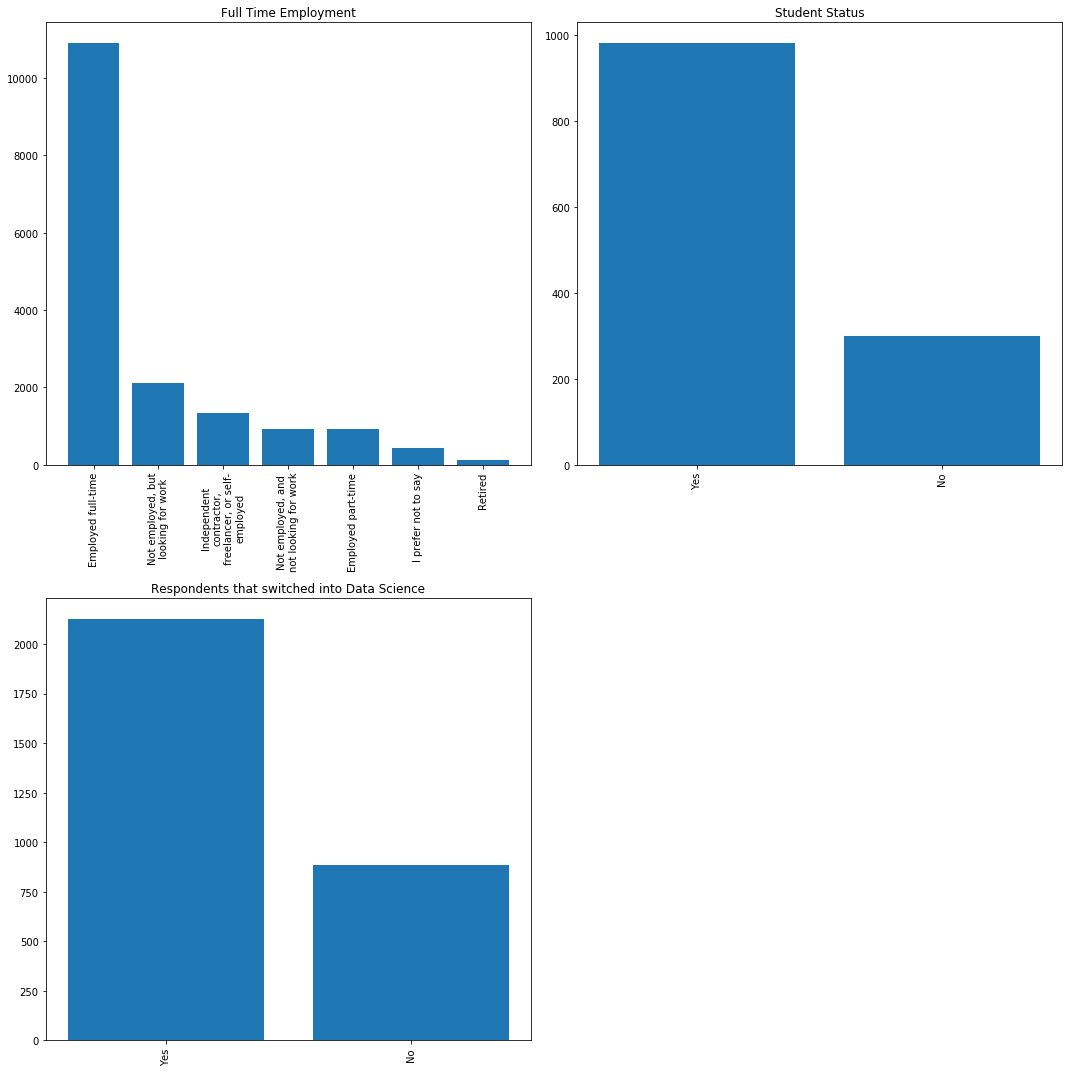

In [7]:
employment_counts = mc_df['EmploymentStatus'].value_counts()
employment_labels = mc_df['EmploymentStatus'].value_counts().index.tolist()
employment_labels = [ '\n'.join(wrap(l, 20)) for l in employment_labels ]

student_counts = mc_df['StudentStatus'].value_counts()
student_labels = mc_df['StudentStatus'].value_counts().index.tolist()
student_labels = [ '\n'.join(wrap(l, 20)) for l in student_labels ]


switcher_counts = mc_df['CareerSwitcher'].value_counts()
switcher_labels = mc_df['CareerSwitcher'].value_counts().index.tolist()
switcher_labels = [ '\n'.join(wrap(l, 20)) for l in switcher_labels ]

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.bar(np.arange(len(employment_counts)), employment_counts)
plt.xticks(
    np.arange(len(employment_counts)), 
    employment_labels,
    rotation='90'
)
plt.title('Full Time Employment')

plt.subplot(2, 2, 2)
plt.bar(np.arange(len(student_counts)), student_counts)
plt.xticks(
    np.arange(len(student_counts)), 
    student_labels,
    rotation='90'
)
plt.title('Student Status')

plt.subplot(2, 2, 3)
plt.bar(np.arange(len(switcher_counts)), switcher_counts)
plt.xticks(
    np.arange(len(switcher_counts)), 
    switcher_labels,
    rotation='90'
)
plt.title('Respondents that switched into Data Science')

plt.tight_layout()
plt.show()

Edit: in hindsight, the yes/no bar graphs aren't very informative and should be taken out. A single percentage would have shown the same information.

# What are the respondant's salaries?

The first step will be to convert all of the currencies to the same currency so that we are able to compare it. I will use US Dollars because that is the currency I use.

In [8]:
# First, we need the currency conversion rates included with this dataset. 
# We will load it as a separate DataFrame.
conversion_df = pd.read_csv('Data Jobs//conversionRates.csv')
conversion_df.set_index('Unnamed: 0', drop=True, inplace=True)
conversion_df.index.rename('Index', inplace=True)

# I have found so far that printing the head() is very helpful in understanding the data, so we'll do that now
conversion_df.head()

,originCountry,exchangeRate
Index,,
1,USD,1.000000
2,EUR,1.195826
3,INR,0.015620
4,GBP,1.324188
5,BRL,0.321350


A new challenge! I have not yet had to manipulate two separate dataframes, so this will be a new experience. The salary data is split into two columns: 'CompensationAmount' and 'CompensationCurrency'. We will make new columns in our mc_df so that we can retain the original values for another question I'll ask later on.

In [9]:
# I ran into a bad currency value, 'SPL'. The conversion csv does not have this value, and the only currency
# that is within one character difference is the value 'SZL', so I will change that below
mc_df.replace('SPL', 'SZL')

# I will make a numpy array for the correct conversion rates
converted_array = np.zeros(len(mc_df)).reshape(len(mc_df), 1)

for i, currency in enumerate(mc_df['CompensationCurrency']):
    if type(currency) == str:
        try:
            converted_array[i] = float(mc_df.loc[i, 'CompensationAmount'].replace(',', '')) * (conversion_df[conversion_df['originCountry'] == currency]['exchangeRate'])
        except:
            converted_array[i] = np.nan
    else:
        converted_array[i] = np.nan
        
# Now, we can add our numpy array as a column in mc_df   
mc_df['ConvertedSalaries'] = converted_array

We can look for outliers in our salary data with a box and whisker plot

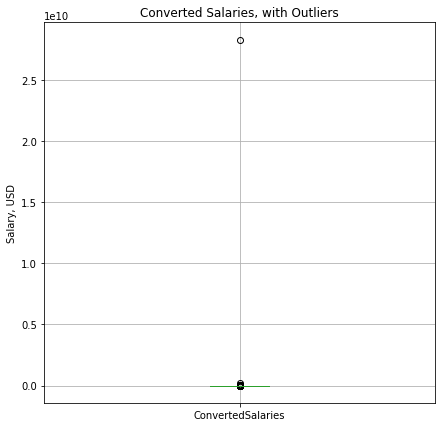

In [10]:
mc_df.boxplot(column='ConvertedSalaries', figsize=(7, 7))
plt.ylabel('Salary, USD')
plt.title('Converted Salaries, with Outliers')
plt.show()

Yikes, that one value at the top of the plot is really obscuring the rest of the data. This could be problematic for computing summary statistics because the mean and the standard deviation will be sensitive to outliers, especially if they are this large. I will remove the outliers, and try again with another box plot.

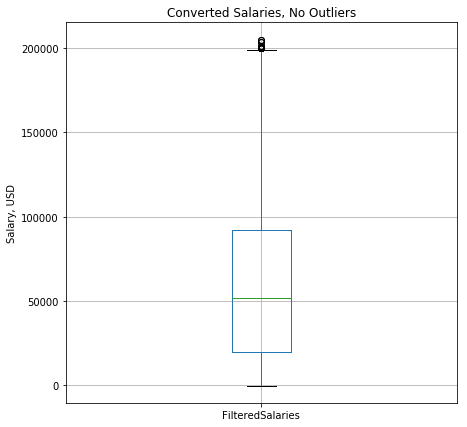

In [11]:
# First, let's calculate the IQR. We'll use the quantile() method to get our quartiles
first_quartile = mc_df['ConvertedSalaries'].quantile(0.25)
third_quartile = mc_df['ConvertedSalaries'].quantile(0.75)
iqr = third_quartile - first_quartile

# This conditional filter is a bit hard to read so I'll explain
# It uses the bitwise operator for 'and', which is '|', to separate it's two conditional statements.
# These conditional statements limit the range of the data within IQR +/- 1.5 * IQR.
# Finally, the ['ConvertedSalaries'] slice is added to 
# the end to select only one column for the new column ['FilteredSalaries']
mc_df['FilteredSalaries'] = mc_df[((first_quartile - 1.5*iqr) >= mc_df['ConvertedSalaries']) |
                          (mc_df['ConvertedSalaries'] <= (third_quartile + 1.5*iqr))]['ConvertedSalaries']

# Lastly, we will make another box and whisker plot
mc_df.boxplot(column='FilteredSalaries', figsize=(7, 7))
plt.ylabel('Salary, USD')
plt.title('Converted Salaries, No Outliers')
plt.show()

That is much better! Now we can see that our data is within an acceptable range, so let's check out the salary distribution, shall we?

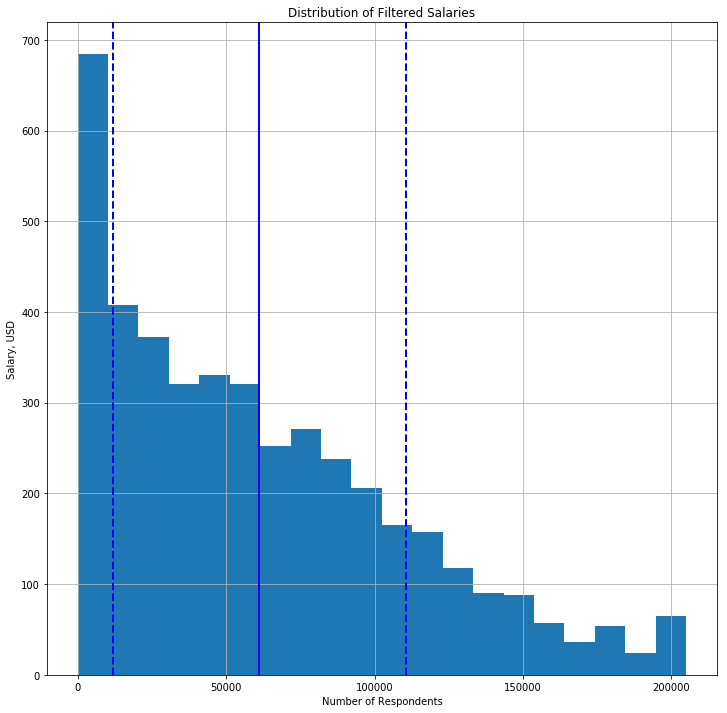

count    4.373000e+03
mean     6.591048e+06
std      4.279242e+08
min     -7.351631e+01
25%      2.052000e+04
50%      5.381217e+04
75%      9.566608e+04
max      2.829740e+10
Name: ConvertedSalaries, dtype: float64

In [12]:
mc_df.hist(column='FilteredSalaries', figsize=(12, 12), bins=20)
plt.axvline(mc_df.FilteredSalaries.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(mc_df.FilteredSalaries.mean() + mc_df.FilteredSalaries.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(mc_df.FilteredSalaries.mean() - mc_df.FilteredSalaries.std(), color='b', linestyle='dashed', linewidth=2)
plt.title('Distribution of Filtered Salaries')
plt.ylabel('Salary, USD')
plt.xlabel('Number of Respondents')
plt.show()

mc_df['ConvertedSalaries'].describe()

# How does salary vary with demographics?

Unfortunately, I spent a ton of time trying to convert my salaries into purchasing power using outside csv files, but it turned out to be a waste of time. The "CompensationCurrency" did not have the same values as the Purchasing Power document I found, and I spent a few days on it before giving up. Instead, we will focus our efforts on US salaries only, because it doesn't make sense to compare salaries from countries with different costs of living :( 

In [13]:
# A new dataframe to work with. I will be able to add columns from mc_df easily in this format.
us_salary_df = mc_df[mc_df['CompensationCurrency'] == 'USD'].loc[:,
    ['CompensationAmount', 'Age', 'EmploymentStatus', 'GenderSelect', 'LearningCategorySelftTaught',
     'LearningCategoryOnlineCourses', 'LearningCategoryWork', 'LearningCategoryUniversity',
     'LearningCategoryKaggle', 'LearningCategoryOther']]

# Reset the index to 1:len(df) 
us_salary_df.index = pd.RangeIndex(len(us_salary_df.index))

# Let's change all of the salaries to floats instead of strings
for i, salary in enumerate(us_salary_df['CompensationAmount']):
    try:
        us_salary_df.loc[i, 'CompensationAmount'] = float(salary.replace(',', ''))
    except:
        us_salary_df.loc[i, 'CompensationAmount'] = np.nan

us_salary_df.head()

,CompensationAmount,Age,EmploymentStatus,GenderSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther
0,250000,56.0,"Independent contractor, freelancer, or self-em...",Male,30.0,0.0,40.0,30.0,0.0,0.0
1,20000,25.0,Employed part-time,Male,30.0,20.0,0.0,50.0,0.0,0.0
2,100000,33.0,Employed full-time,Male,10.0,30.0,0.0,10.0,50.0,0.0
3,133000,35.0,Employed full-time,Male,10.0,50.0,15.0,0.0,25.0,0.0
4,80000,37.0,Employed full-time,Male,40.0,0.0,58.0,2.0,0.0,0.0


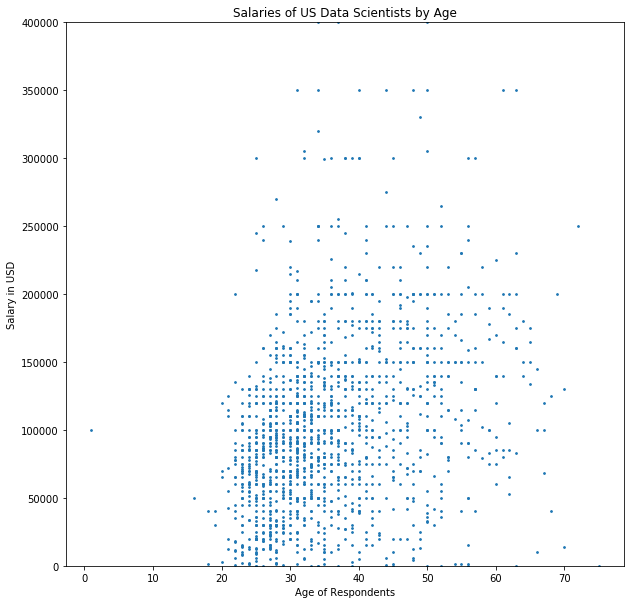

count    1564.000000
mean       35.987852
std        10.287386
min         1.000000
25%        28.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(us_salary_df['Age'], us_salary_df['CompensationAmount'], s=3)
plt.ylim([0, 400000])
plt.xlabel('Age of Respondents')
plt.ylabel('Salary in USD')
plt.title('Salaries of US Data Scientists by Age')
plt.show()
us_salary_df['Age'].describe()

It appears that age has a very weak correlation to salary in the United States. I'd argue that it is weak because to the right of the main blob of salaries, they seem to cluster a little higher. That being said, it is stil very much a blob. Next we will see if there is any correlation between salary and how the percentage of respondents learning categories.

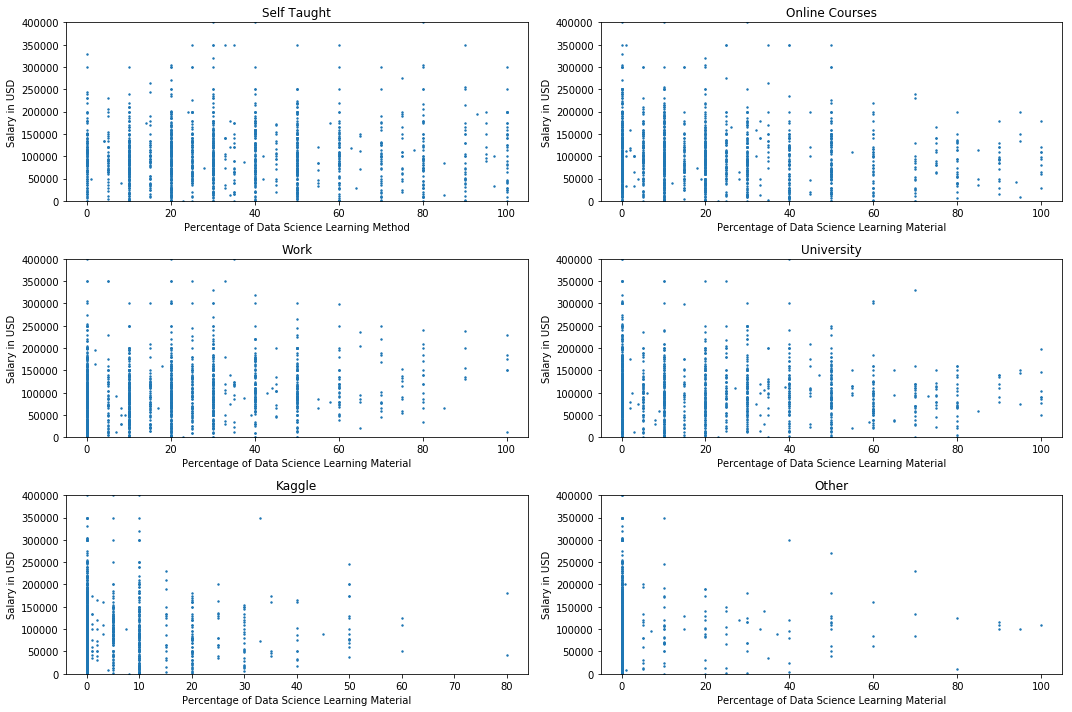

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.scatter(us_salary_df['LearningCategorySelftTaught'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Method')
plt.ylabel('Salary in USD')
plt.title('Self Taught')

plt.subplot(3, 2, 2)
plt.scatter(us_salary_df['LearningCategoryOnlineCourses'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Material')
plt.ylabel('Salary in USD')
plt.title('Online Courses')

plt.subplot(3, 2, 3)
plt.scatter(us_salary_df['LearningCategoryWork'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Material')
plt.ylabel('Salary in USD')
plt.title('Work')

plt.subplot(3, 2, 4)
plt.scatter(us_salary_df['LearningCategoryUniversity'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Material')
plt.ylabel('Salary in USD')
plt.title('University')

plt.subplot(3, 2, 5)
plt.scatter(us_salary_df['LearningCategoryKaggle'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Material')
plt.ylabel('Salary in USD')
plt.title('Kaggle')

plt.subplot(3, 2, 6)
plt.scatter(us_salary_df['LearningCategoryOther'], us_salary_df['CompensationAmount'], s=2)
plt.ylim([0, 400000])
plt.xlabel('Percentage of Data Science Learning Material')
plt.ylabel('Salary in USD')
plt.title('Other')

plt.tight_layout()
plt.show()

Because the percentages were discrete rather than continuous, it is difficult to identify any obvious trends such as a linear correlation, but there is still some information we can glean from this. For instance, in the self taught graph, it is evident that almost every data scientist does some self teaching. This is in line with what I've heard about the field, and it makes sense because the industry is advancing rather rapidly. You have to keep up with cutting edge in a lot of data science fields or risk getting replaced or surpassed by someone who does.

There also appears to be a small upward trend on the right sides of the Work graph. However, I do not think that this means you should only focus on learning at work to increase your salary. I imagine that this small trend is the result of an occupation that is very challenging, or maybe consists of research. This explanation works because their jobs consist of learning about data science itself. 

In [16]:
male_average_salary = us_salary_df['CompensationAmount'][us_salary_df['GenderSelect'] == 'Male'].mean()
female_average_salary = us_salary_df['CompensationAmount'][us_salary_df['GenderSelect'] == 'Female'].mean()

print('The average male salary in the United States is ${0:.2f}, while the average female salary is ${1:.2f}'.format(male_average_salary, female_average_salary))
print('Women in Data Science make %{0:.2f} of what their male counterparts make.'.format(female_average_salary/male_average_salary*100))

The average male salary in the United States is $119764.69, while the average female salary is $93135.72
Women in Data Science make %77.77 of what their male counterparts make.


According to Rick and Morty (S1 E7), the salary gap between men and women is 70%. (Actually, according to wikipedia and the sources in it, the gap is closer to 78%). There are arguments that 78% is an exaggeration of the true gender wage gap, but we do not have the means to analyze this from the survey data.

# Conclusion

In conclusion, we can see that gender plays a similar role in salary as it does in most STEM jobs. Although not shown in my analysis, kaggle's analysis of their survey showed that people with higher education were more likely to make a higher salary.

I've been working on this for three weeks now and I am going to call it here. It's time to move on to the real bootcamp.


Hello GitHub! I'm making a simple edit to see how this works with Jupyter. Should be the same process as with the Readme. Let's find out!